# !pip install pysentimiento==0.7.2

In [10]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")


In [11]:
analyzer.predict("Qué olor a mandarina")

AnalyzerOutput(output=NEG, probas={NEG: 0.740, NEU: 0.174, POS: 0.087})

In [12]:
#Hate Speech(monarquia)

hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [13]:
hate_speech_analyzer.predict('charla basto monarqu convincent')

AnalyzerOutput(output=[], probas={hateful: 0.030, targeted: 0.022, aggressive: 0.024})

In [5]:
analyzer.predict('charla basto monarqu convincent')

AnalyzerOutput(output=NEU, probas={NEU: 0.573, NEG: 0.258, POS: 0.169})

In [4]:
import pandas as pd
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_monarquia_procesado.csv')

In [7]:
df['comment_stem'][0]

'monarquia vividor estan dinerito buena vida'

In [8]:
def asignar_valor(elemento):
    if isinstance(elemento, str):
        resultado = analyzer.predict(elemento)
        if resultado.output == 'NEG':
            return -1
        elif resultado.output == 'NEU':
            return 0
        elif resultado.output == 'POS':
            return 1
        else:
            print(f"Output de sentimiento desconocido: {resultado.output}")
            return None  # Manejar otros casos si es necesario

# Aplicar la función a la columna 'comment_stem' y crear una nueva columna 'valor_asignado'
df['sentiment'] = df['comment_stem'].apply(lambda x: asignar_valor(x))

# Mostrar el DataFrame con la nueva columna


In [9]:
df.head()

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment
0,0,WdtyLi2wBDs,UC1rwE0pwb1Q_m0Cefl-bVOA,Todos los de la monarquia són únos vividores! ...,monarquia vividor estan dinerito buena vida,[0. 0. 0. ... 0. 0. 0.],-1.0
1,1,WdtyLi2wBDs,UC1rwE0pwb1Q_m0Cefl-bVOA,Sabeis porque el viejo se fue de españa? Porqu...,sabei viejo espa tenia miedo mataran esposa,[0. 0. 0. ... 0. 0. 0.],-1.0
2,2,WdtyLi2wBDs,UCTkpp46iUcTXPh_bjDgOZCg,De hecho me hubiera gustado que mi país (venez...,hecho gustado venezuela hecho monarquia podido...,[0. 0. 0. ... 0. 0. 0.],0.0
3,3,WdtyLi2wBDs,UCPOFnRYCCd5mEoAuoSyAAxA,1er error. Me la pela qué no se haya votado po...,error pela votado mejor persona puesto peticio...,[0. 0. 0. ... 0. 0. 0.],0.0
4,4,WdtyLi2wBDs,UCgW7xHsCcD7fCUpo0g0OkeA,La mayoría que son republicanos la verdad es p...,mayor republicano verdad estan moda piensan,[0. 0. 0. ... 0. 0. 0.],-1.0


In [10]:
df['sentiment'].value_counts()

 0.0    4114
-1.0    2647
 1.0    1043
Name: sentiment, dtype: int64

In [11]:
df[df['sentiment']==-1]

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment
0,0,WdtyLi2wBDs,UC1rwE0pwb1Q_m0Cefl-bVOA,Todos los de la monarquia són únos vividores! ...,monarquia vividor estan dinerito buena vida,[0. 0. 0. ... 0. 0. 0.],-1.0
1,1,WdtyLi2wBDs,UC1rwE0pwb1Q_m0Cefl-bVOA,Sabeis porque el viejo se fue de españa? Porqu...,sabei viejo espa tenia miedo mataran esposa,[0. 0. 0. ... 0. 0. 0.],-1.0
4,4,WdtyLi2wBDs,UCgW7xHsCcD7fCUpo0g0OkeA,La mayoría que son republicanos la verdad es p...,mayor republicano verdad estan moda piensan,[0. 0. 0. ... 0. 0. 0.],-1.0
9,9,WdtyLi2wBDs,UCiC-gMBBwMTooB6QDiMzn8Q,"Increíble!!, por esto China y varios paises as...",incr china vario pais tico estan avanzado deca...,[0. 0. 0. ... 0. 0. 0.],-1.0
11,11,WdtyLi2wBDs,UChxpI5Pa84TgzAeOAV9KXuw,Sánchez a conseguido desprestigiar a la corona...,nchez conseguido desprestigiar corona felip ll...,[0. 0. 0. ... 0. 0. 0.],-1.0
...,...,...,...,...,...,...,...
8030,8030,BKihmrRnzZ4,UCtYZ6ZgX1F9mcDQ2kdhKVvw,Siempre dijeron que el Preparado era más Greci...,siempr dijeron preparado grecia borb aguanta b...,[0. 0. 0. ... 0. 0. 0.],-1.0
8033,8033,BKihmrRnzZ4,UCw1wgSTwq_-znBn6Sd7JIxw,😂😂😂😂 solo estupideses dejen a esos mierdas en ...,solo estupides dejen mierda clavo,[0. 0. 0. ... 0. 0. 0.],-1.0
8039,8039,4OmN9EOBABQ,UC-5css8sM2g_e2U-NivhHHg,Y la acusaban en el pasado de haber abortado a...,acusaban pasado haber abortado bebe hombr feli...,[0. 0. 0. ... 0. 0. 0.],-1.0
8041,8041,Q881DsExsIA,UCN146YWKCCxWw-Gz4URUPkw,"Otro que quiere subirse al carro, y ser protag...",quier subirs carro protagonista poca verg enza...,[0. 0. 0. ... 0. 0. 0.],-1.0


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
def show_wordcloud(df, column_name):
    all_words = df[column_name].tolist()
    all_words_str = ' '.join([str(x) for x in all_words if str(x).lower()]) 

    # Define la fuente TrueType que quieres usar (asegúrate de que sea compatible)
    font_path = 'arial.ttf'
    
    # Resto de tu código para procesar el texto y generar la WordCloud...
    wordcloud = WordCloud(
        width=2000,
        height=1000,
        random_state=1,
        background_color='black',
        colormap='viridis',
        #font_path=font_path
    ).generate(all_words_str)
    
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

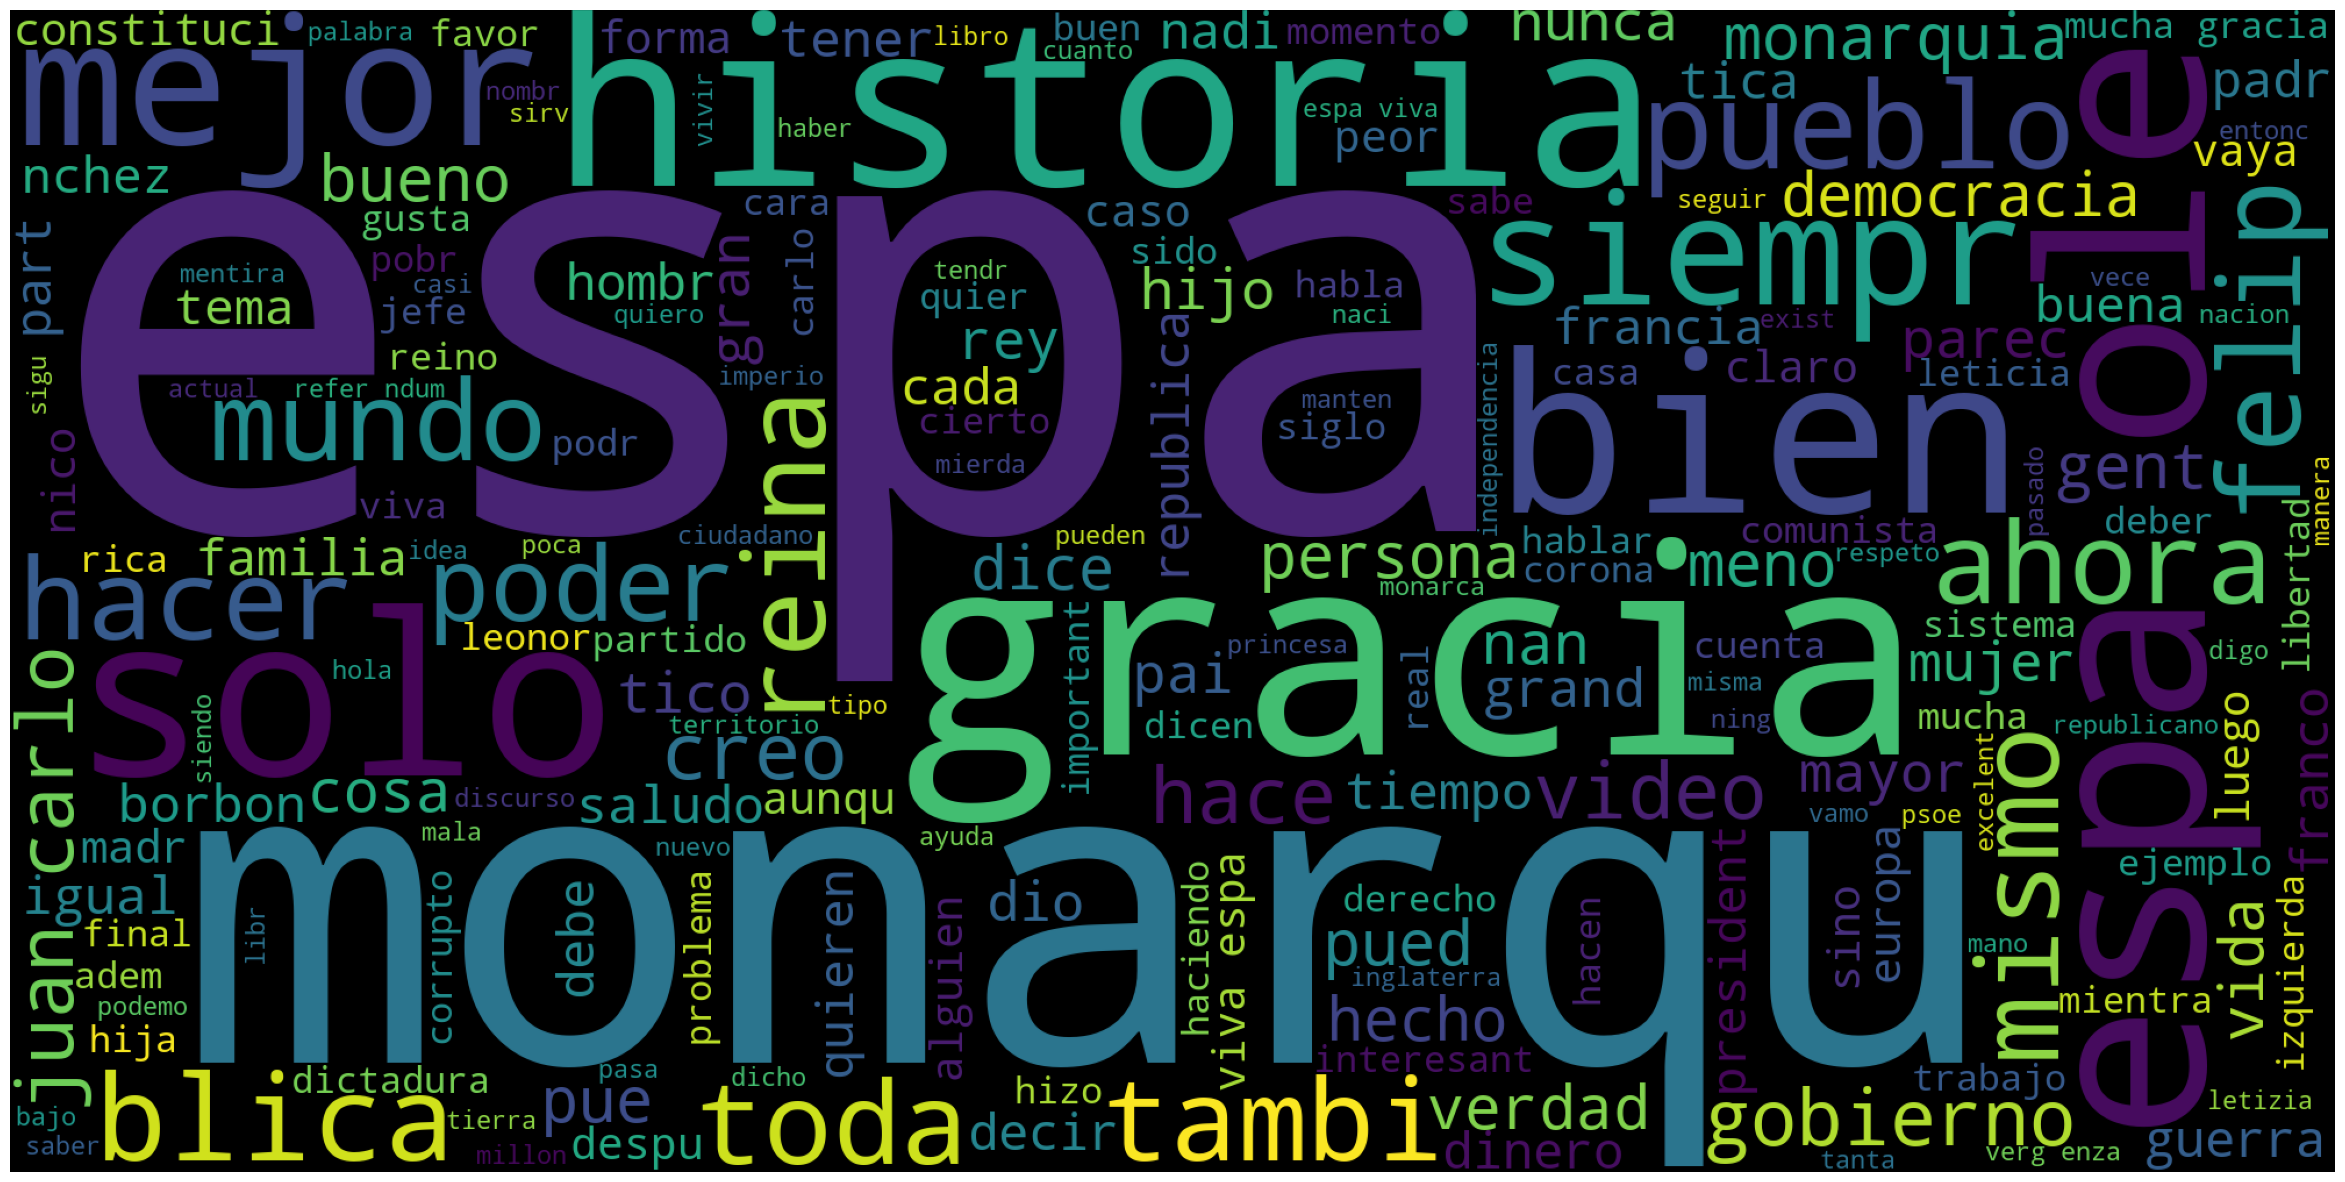

In [14]:
show_wordcloud(df,'comment_stem')

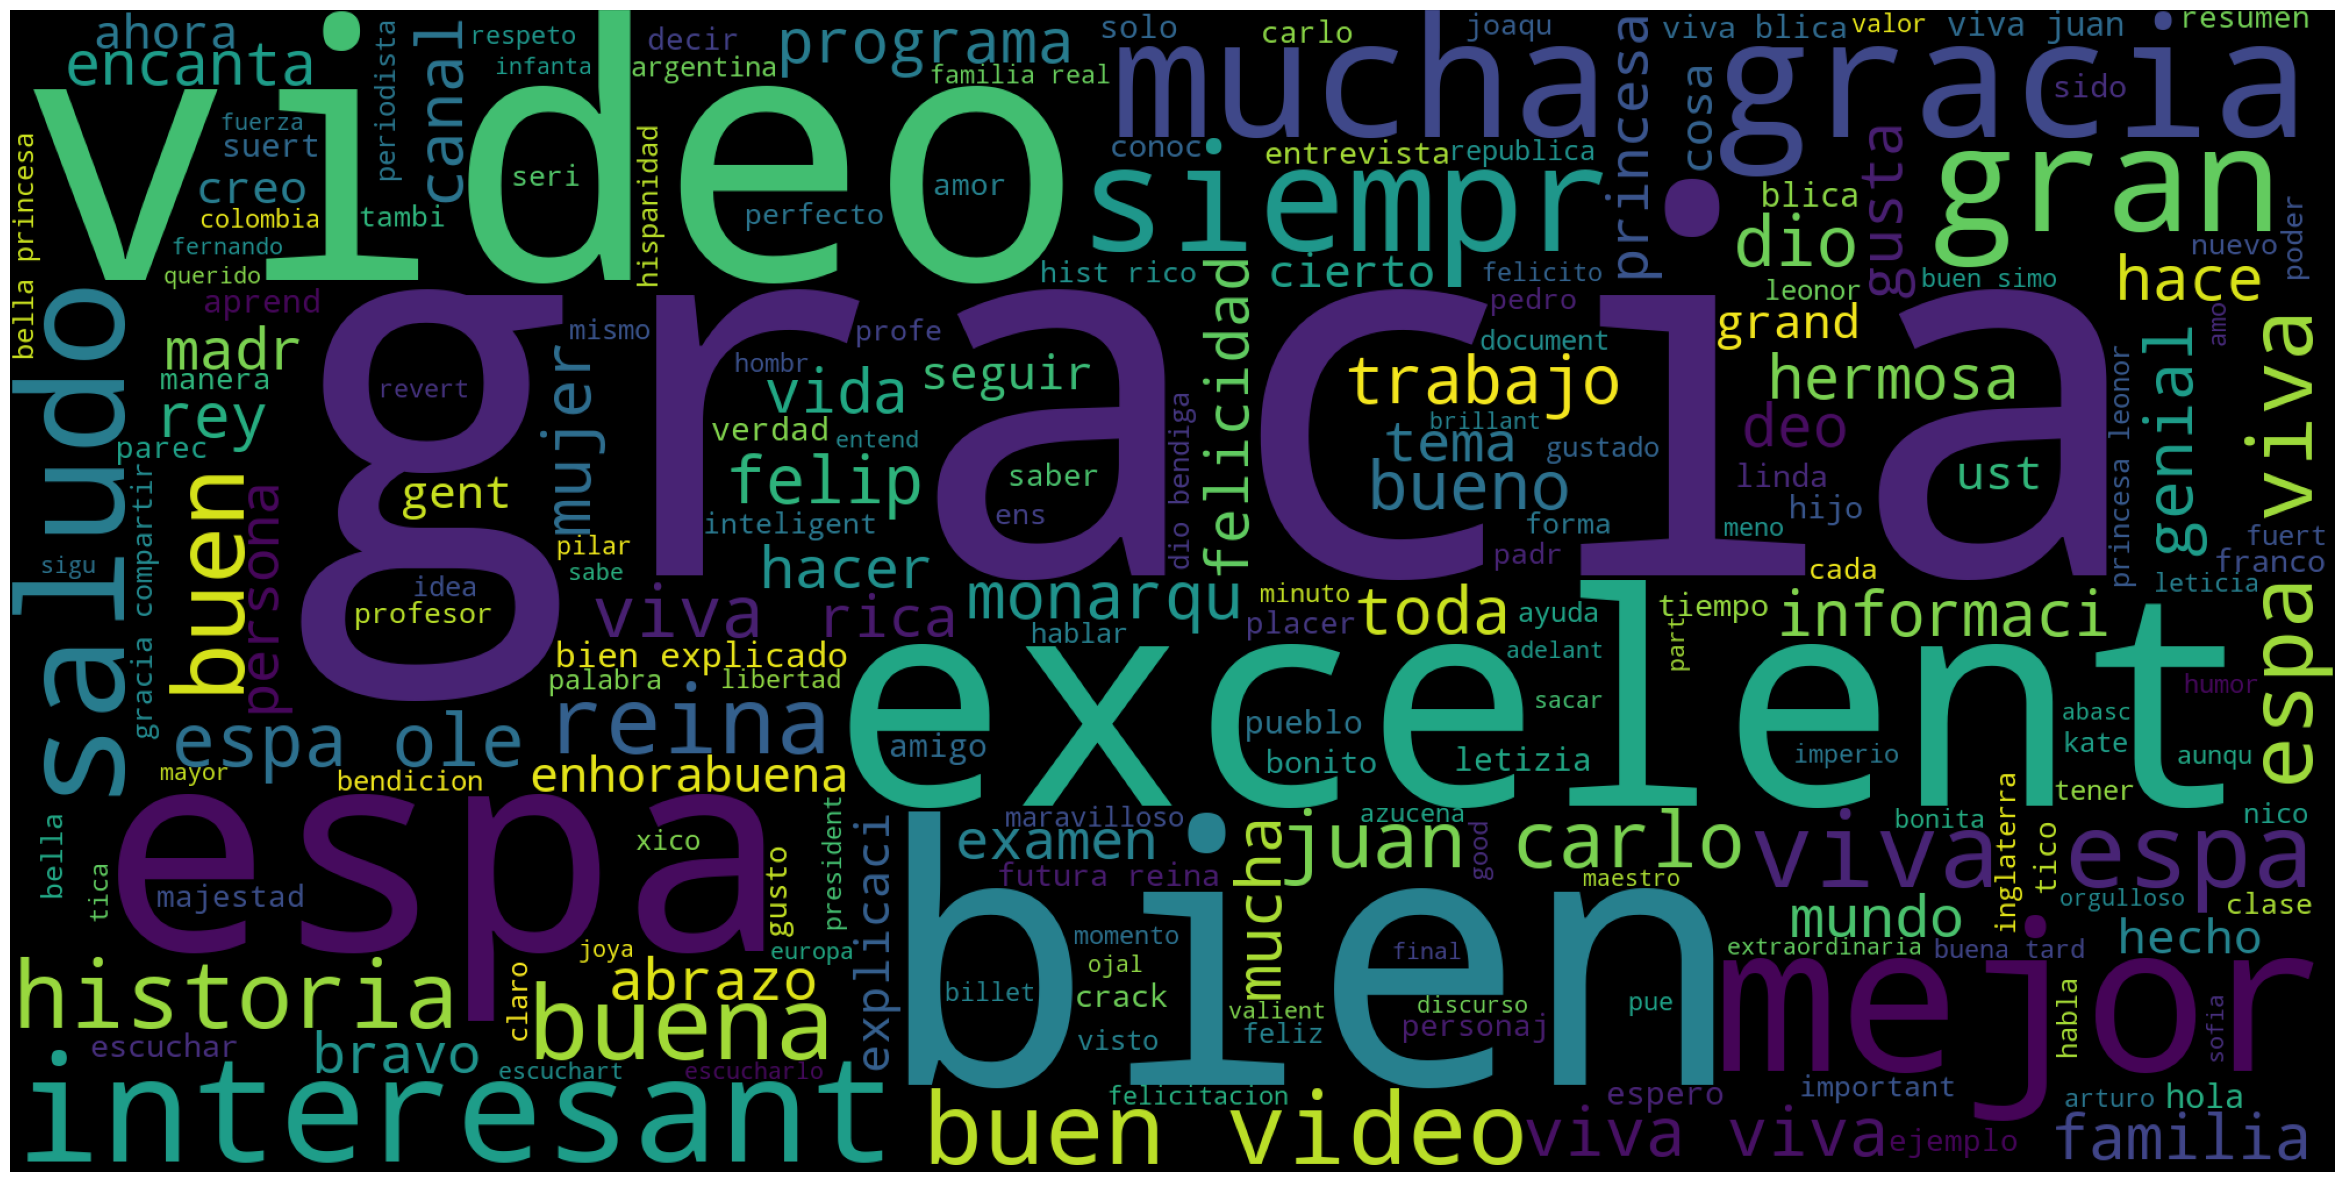

In [15]:
show_wordcloud(df[df['sentiment'] == 1], 'comment_stem')

In [16]:
df.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_monarquia_sentimiento.csv')

In [17]:
# Filtrar las filas donde 'sentiment' es igual a -1
df_neg = df[df['sentiment'] == -1]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neg = df_neg[columnas_deseadas].copy()

df_neg.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,WdtyLi2wBDs,UC1rwE0pwb1Q_m0Cefl-bVOA,Todos los de la monarquia són únos vividores! ...,[0. 0. 0. ... 0. 0. 0.],monarquia vividor estan dinerito buena vida,-1.0
1,WdtyLi2wBDs,UC1rwE0pwb1Q_m0Cefl-bVOA,Sabeis porque el viejo se fue de españa? Porqu...,[0. 0. 0. ... 0. 0. 0.],sabei viejo espa tenia miedo mataran esposa,-1.0
4,WdtyLi2wBDs,UCgW7xHsCcD7fCUpo0g0OkeA,La mayoría que son republicanos la verdad es p...,[0. 0. 0. ... 0. 0. 0.],mayor republicano verdad estan moda piensan,-1.0
9,WdtyLi2wBDs,UCiC-gMBBwMTooB6QDiMzn8Q,"Increíble!!, por esto China y varios paises as...",[0. 0. 0. ... 0. 0. 0.],incr china vario pais tico estan avanzado deca...,-1.0
11,WdtyLi2wBDs,UChxpI5Pa84TgzAeOAV9KXuw,Sánchez a conseguido desprestigiar a la corona...,[0. 0. 0. ... 0. 0. 0.],nchez conseguido desprestigiar corona felip ll...,-1.0


In [18]:
df_neg.shape

(2647, 6)

In [19]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_monarquia_negativo.csv')

In [20]:
import pandas as pd

In [21]:
df_neg = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_monarquia_negativo.csv')

In [22]:
df_neg.shape

(2647, 7)

In [15]:
def hateful(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'hateful' está presente en las probabilidades
        if 'hateful' in resultado.probas:
            return resultado.probas['hateful']  # Devolver el valor de 'hateful'
        else:
            print(f"No se encontró 'hateful' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [24]:
df_neg['c_hateful'] = df_neg['comment_stem'].apply(lambda x: hateful(x))

In [25]:
df_neg['comment_stem'][2472]

'europea gran pozo mierda lleno criminal delincuent roban impuesto dinero vida patriota miembro europea denunciar juzgar tanta irregularidad cometiendo ciudadano europeo'

In [26]:
hate_speech_analyzer.predict('polic migraci dejan meter saben corren peligro')

AnalyzerOutput(output=[], probas={hateful: 0.397, targeted: 0.005, aggressive: 0.148})

In [16]:
def targeted(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'targeted' está presente en las probabilidades
        if 'targeted' in resultado.probas:
            return resultado.probas['targeted']  # Devolver el valor de 'targeted'
        else:
            print(f"No se encontró 'targeted' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [28]:
df_neg['targeted'] = df_neg['comment_stem'].apply(lambda x: targeted(x))

In [17]:
def aggresive(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'aggressive' está presente en las probabilidades
        if 'aggressive' in resultado.probas:
            return resultado.probas['aggressive']  # Devolver el valor de 'aggressive'
        else:
            print(f"No se encontró 'aggressive' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [30]:
df_neg['aggresive'] = df_neg['comment_stem'].apply(lambda x: aggresive(x))

In [31]:
df_neg.head()

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment,c_hateful,targeted,aggresive
0,0,WdtyLi2wBDs,UC1rwE0pwb1Q_m0Cefl-bVOA,Todos los de la monarquia són únos vividores! ...,[0. 0. 0. ... 0. 0. 0.],monarquia vividor estan dinerito buena vida,-1.0,0.105846,0.024682,0.100212
1,1,WdtyLi2wBDs,UC1rwE0pwb1Q_m0Cefl-bVOA,Sabeis porque el viejo se fue de españa? Porqu...,[0. 0. 0. ... 0. 0. 0.],sabei viejo espa tenia miedo mataran esposa,-1.0,0.038352,0.018778,0.026259
2,4,WdtyLi2wBDs,UCgW7xHsCcD7fCUpo0g0OkeA,La mayoría que son republicanos la verdad es p...,[0. 0. 0. ... 0. 0. 0.],mayor republicano verdad estan moda piensan,-1.0,0.100563,0.008015,0.038865
3,9,WdtyLi2wBDs,UCiC-gMBBwMTooB6QDiMzn8Q,"Increíble!!, por esto China y varios paises as...",[0. 0. 0. ... 0. 0. 0.],incr china vario pais tico estan avanzado deca...,-1.0,0.218482,0.009150,0.073756
4,11,WdtyLi2wBDs,UChxpI5Pa84TgzAeOAV9KXuw,Sánchez a conseguido desprestigiar a la corona...,[0. 0. 0. ... 0. 0. 0.],nchez conseguido desprestigiar corona felip ll...,-1.0,0.009297,0.011363,0.013221


In [32]:
df_neg.aggresive

0       0.100212
1       0.026259
2       0.038865
3       0.073756
4       0.013221
          ...   
2642    0.054070
2643    0.028773
2644    0.010954
2645    0.058619
2646    0.021025
Name: aggresive, Length: 2647, dtype: float64

In [33]:
import matplotlib.pyplot as plt

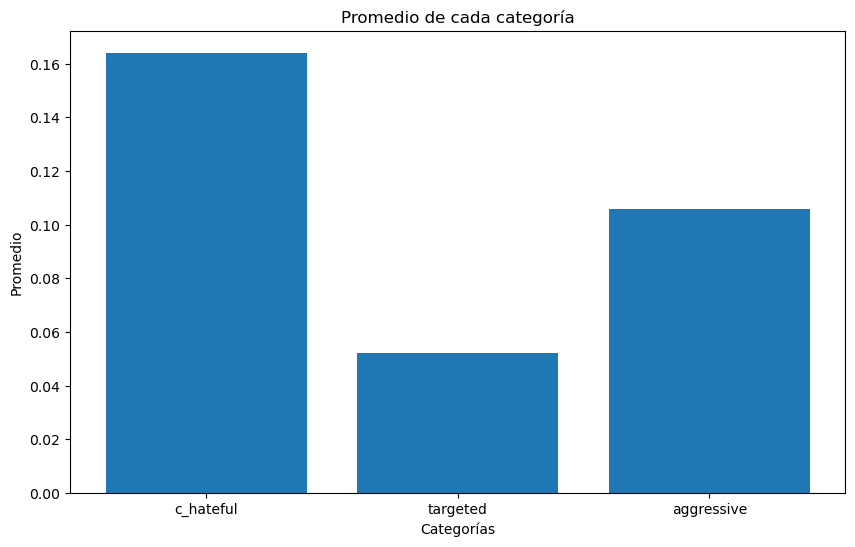

In [34]:
c_hateful = df_neg['c_hateful']
targeted = df_neg['targeted']
aggresive = df_neg['aggresive']

plt.figure(figsize=(10, 6))

plt.bar(['c_hateful', 'targeted', 'aggressive'], [c_hateful.mean(), targeted.mean(), aggresive.mean()])
plt.xlabel('Categorías')
plt.ylabel('Promedio')
plt.title('Promedio de cada categoría')

plt.show()



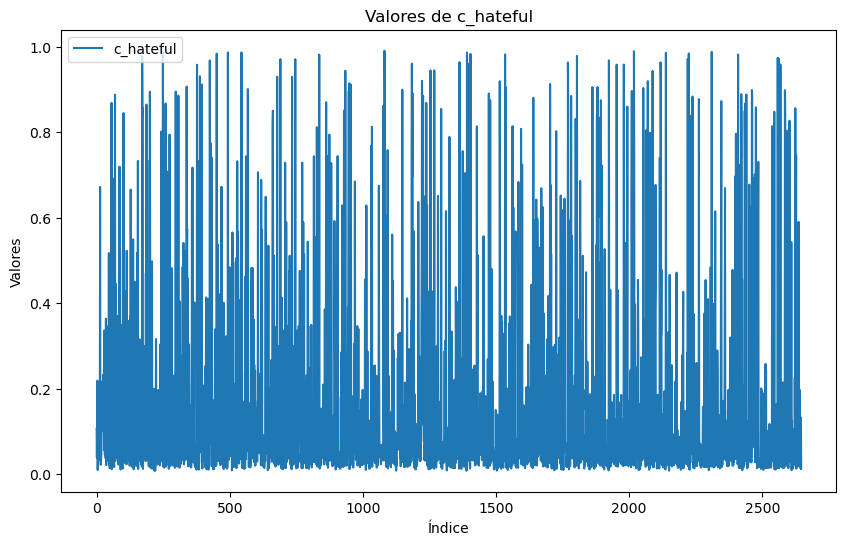

In [35]:
plt.figure(figsize=(10, 6))

plt.plot(df_neg['c_hateful'], label='c_hateful')
# plt.plot(df_neg['targeted'], label='targeted')
# plt.plot(df_neg['aggresive'], label='aggresive')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Valores de c_hateful')
plt.legend()

plt.show()

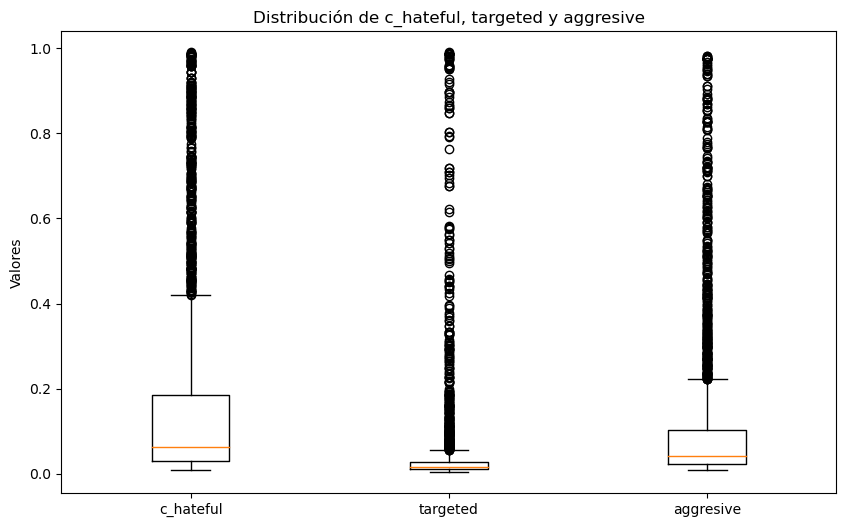

In [36]:
plt.figure(figsize=(10, 6))

plt.boxplot([c_hateful, targeted, aggresive], labels=['c_hateful', 'targeted', 'aggresive'])
plt.ylabel('Valores')
plt.title('Distribución de c_hateful, targeted y aggresive')

plt.show()

In [37]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_negativos_monarquia_ filtrados.csv')

Filtrar los neutros

In [27]:
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_monarquia_sentimiento.csv')

In [28]:
# Filtrar las filas donde 'sentiment' es igual a 0 =neutro
df_neutro = df[df['sentiment'] == 0]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neutro = df_neutro[columnas_deseadas].copy()

df_neutro.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
2,WdtyLi2wBDs,UCTkpp46iUcTXPh_bjDgOZCg,De hecho me hubiera gustado que mi país (venez...,[0. 0. 0. ... 0. 0. 0.],hecho gustado venezuela hecho monarquia podido...,0.0
3,WdtyLi2wBDs,UCPOFnRYCCd5mEoAuoSyAAxA,1er error. Me la pela qué no se haya votado po...,[0. 0. 0. ... 0. 0. 0.],error pela votado mejor persona puesto peticio...,0.0
5,WdtyLi2wBDs,UCgW7xHsCcD7fCUpo0g0OkeA,Concuerdo totalmente,[0. 0. 0. ... 0. 0. 0.],concuerdo totalment,0.0
6,WdtyLi2wBDs,UCe4DyAgY27gIlhTMUFRgddw,"Buenos días, hay otro argumento, para mí muy i...",[0. 0. 0. ... 0. 0. 0.],bueno argumento important espa lleno tradicion...,0.0
7,WdtyLi2wBDs,UCW1_64QJukG8Nx-ElnUfmZg,Totalmente de acuerdo …. Mejor explicado impos...,[0. 0. 0. ... 0. 0. 0.],totalment acuerdo mejor explicado impos,0.0


In [29]:
df_neutro.to_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_monarquia_neutro.csv')

In [30]:
df_neutro = pd.read_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_monarquia_neutro.csv')
df_neutro

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,2,WdtyLi2wBDs,UCTkpp46iUcTXPh_bjDgOZCg,De hecho me hubiera gustado que mi país (venez...,[0. 0. 0. ... 0. 0. 0.],hecho gustado venezuela hecho monarquia podido...,0.0
1,3,WdtyLi2wBDs,UCPOFnRYCCd5mEoAuoSyAAxA,1er error. Me la pela qué no se haya votado po...,[0. 0. 0. ... 0. 0. 0.],error pela votado mejor persona puesto peticio...,0.0
2,5,WdtyLi2wBDs,UCgW7xHsCcD7fCUpo0g0OkeA,Concuerdo totalmente,[0. 0. 0. ... 0. 0. 0.],concuerdo totalment,0.0
3,6,WdtyLi2wBDs,UCe4DyAgY27gIlhTMUFRgddw,"Buenos días, hay otro argumento, para mí muy i...",[0. 0. 0. ... 0. 0. 0.],bueno argumento important espa lleno tradicion...,0.0
4,7,WdtyLi2wBDs,UCW1_64QJukG8Nx-ElnUfmZg,Totalmente de acuerdo …. Mejor explicado impos...,[0. 0. 0. ... 0. 0. 0.],totalment acuerdo mejor explicado impos,0.0
...,...,...,...,...,...,...,...
4109,8036,4OmN9EOBABQ,UCOZZ8n7kDaNTpV3ytWP1PVQ,Si hubiese hecho caso a su padre y se h...,[0. 0. 0. ... 0. 0. 0.],hecho caso padr divorciado ahora tard visto ca...,0.0
4110,8037,4OmN9EOBABQ,UCszYt2DBq8kuBSAwqE5MMqA,Se le va caer el pelo😂😂😂😂😂,[0. 0. 0. ... 0. 0. 0.],caer pelo,0.0
4111,8038,4OmN9EOBABQ,UCYjPII-33MAaA5454rVa8RQ,Gloria a Dios. Me encontré con esto tan tempr...,[0. 0. 0. ... 0. 0. 0.],gloria dio encontr temprano vida cambiado tota...,0.0
4112,8040,4OmN9EOBABQ,UCDtzVRnX4WGDhQrQ9AtvcoQ,Toma Ya \nTan seria k se le ve,[0. 0. 0. ... 0. 0. 0.],toma seria,0.0


In [18]:
df_neutro['hateful'] = df_neutro['comment_stem'].apply(lambda x: hateful(x))

In [19]:
df_neutro['targeted'] = df_neutro['comment_stem'].apply(lambda x: targeted(x))

In [20]:
df_neutro['aggresive'] = df_neutro['comment_stem'].apply(lambda x: aggresive(x))

In [21]:
df_neutro.columns

Index(['Unnamed: 0', 'video_id', 'author', 'comment', 'vectores_tfidf',
       'comment_stem', 'sentiment', 'hateful', 'targeted', 'aggresive'],
      dtype='object')

In [31]:
#defino los valores de mas de 0.5 en hateful 
hateful_mayor_05 = df_neutro[df_neutro['hateful'] > 0.5]

KeyError: 'hateful'

In [23]:
len(hateful_mayor_05)

119

In [32]:
# Concatenar los DataFrames df_neutro y hateful_mayor_05
df_hate_monarquia = pd.concat([df_neutro, hateful_mayor_05], ignore_index=True)



In [34]:
df_hate_monarquia = df_hate_monarquia.drop([ 'Unnamed: 0'], axis=1)

In [25]:
df_hate_monarquia.to_csv('/Users/usuario/Downloads/irunela/csv/csv_hate/hate_monarquia.csv')

In [26]:
df_hate_monarquia.shape

(4233, 10)